## Projeto Previsão de Churn para empresa de Telecom
Esse projeto tem o objetivo de prever comportamento para fidelizar clientes.Onde será analisado todos os dados relevantes do cliente afim de desenvolver programas de retenção de clientes focados.

O Conjunto de Dados churn da Orange Telecom, que consiste em dados de atividade do cliente limpos (recursos), juntamente com um rótulo de churn especificando se um cliente cancelou a assinatura, será usado para desenvolver modelos preditivos.

O conjunto de dados apresenta as seguintes colunas com os respectivos formato de informação:

- Estado: string
- Comprimento da conta: int
- Código de área: string
- Plano internacional: string
- Plano de correio de voz: string
- Número de mensagens vmail: int
- Total de minutos diurnos: float
- Total de diárias: int
- Carga total do dia: float
- Total de minutos de véspera: float
- Total de chamadas de véspera: int
- Carga total de véspera: float
- Total de minutos noturnos: float
- Total de chamadas noturnas: int
- Carga noturna total: float
- Total de minutos intl: float
- Total de chamadas intl: int
- Carga total intl: float
- Chamadas de atendimento ao cliente: int
- Churn: string


 
  



















## 1- Importando bibliotecas


    

 Para inicio da resolução desse projeto serão importadas as bibliotecas que serão utilizadas

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
#Lendo o dataset

data=pd.read_csv('churn-bigml-80.csv')
data.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2- Tratamento de Dados

In [41]:
data.info() #mostra as colunas e seus respectivos formatos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [42]:
data['Area code'].value_counts() #mostra na coluna selecionada a contagem dos valores contidos

415    1318
510     679
408     669
Name: Area code, dtype: int64

Analisando os valores obtidos podemos concluir que a coluna 'Area code' possui traços de ser classificada como string, com isso transformaremos a coluna que está em int64 para object

In [43]:
data['Area code']=data['Area code'].apply(str) #aplica o formato string
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   object 
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## 2.1- Checando valores nulos

In [44]:
data.isnull().sum() #mostra se há valores nulos nas colunas

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Como demonstrado na linha acima não há valores nulos

## 2.2- Checando valores duplicados

In [45]:
data.duplicated().sum() #não há dados duplicados

0

Como demonstrado na linha acima não há valores duplicados

Como a coluna de 'Churn' está no formato booleano mas o correto é passa-lá para string 

## 2.3- Conversão de formato

In [46]:
data_enc={
    True:'yes',
    False:'no'
}

In [47]:
data['Churn']=data['Churn'].map(data_enc) #percorre a coluna selecionada e substitui os valores selecionados pelo do codigo acima

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   object 
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## 3- Análise exploratória dos dados

In [49]:
data.select_dtypes(include='object').columns #pega o nome das colunas com 'object'
variaveis_categoricas=data.select_dtypes(include='object').columns

In [50]:
data.select_dtypes(include=['float64','int64']).columns
variaveis_numericas=data.select_dtypes(include=['float64','int64']).columns

In [51]:
data.describe() #apresenta as caracteristicas de estatistica descritiva do conjunto de dados

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [52]:
data_churn=data.query('Churn=="yes"') #filtrando pela coluna 'Churn'
display(data_churn)
data_nchurn=data.query('Churn=="no"')
display(data_nchurn)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
18,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,yes
28,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,yes
35,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,yes
45,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,yes
48,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,MI,119,510,Yes,Yes,22,172.1,119,29.26,223.6,133,19.01,150.0,94,6.75,13.9,20,3.75,1,yes
2641,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,yes
2656,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,yes
2657,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,yes


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,no
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no


In [54]:
data[data['Churn']=='yes'] #mesmo efeito do codigo acima
data[data['Churn']=='no']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,no
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no


## 3.1- Levantamento de Hipóteses
1. Será que o estado NS tem menos possibilidades de Churn?
2. Sera que comprimento das contas maiores que 100 tem menos chance de Churn?
3. Será que o codigo de área 415 é mais propenso ao Churn?
4. Será que clientes que tem o plano internacional tem menos chance de Churn?
5. Será que clientes com Voice mail plan tendem a ter menos chance de Churn?
6. Será que quanto maior o numero Total day minutes menor o numero de Churn?
7. Será que quanto maior Total day calls menor o numero de Churn?
8. Será que quanto menor Total day charge menor o numero de Churn?
9. Será que quanto maior Total eve minutes menor o numero de Churn
10. Será que quanto maior Total eve calls menor o numero de Churn?
11. Será que quanto menor Total eve charge menor o numero de Churn?
12. Será que quanto maior Total night minutes menor o numero de Churn?
13. Será que quanto maior Total night calls menor o numero de Churn?
14. Será que quanto menor Total night charge menor o numero de Churn?
15. Será que quanto maior Total intl minutes menor o numero de Churn?
16. Será que quanto maior Total intl calls menor o numero de Churn?
17. Será que quanto menor Total intl charge menor o numero de Churn?
18. Será que quanto mais Costumer service calls menor é o churn?



### 3.1.1- Será que o estado NS tem menos possibilidades de Churn?

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

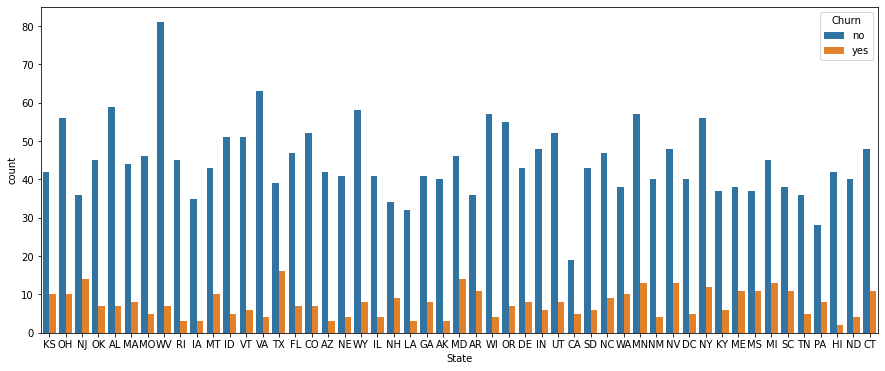

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(data['State'],hue=data['Churn'])


In [56]:
ordem_estados=data['State'].value_counts().index[:15]

In [57]:
data_nchurn.shape[0]

388

<Figure size 1080x432 with 0 Axes>

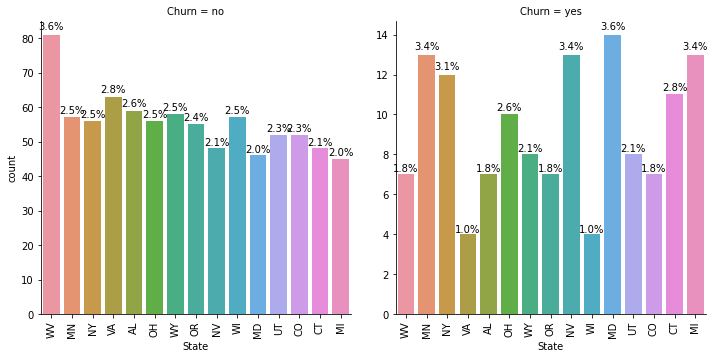

In [61]:
plt.figure(figsize=(15,6))
g = sns.catplot(x = 'State', kind='count', col = 'Churn', data=data, sharey=False,order=ordem_estados)
g.set_xticklabels(rotation=90)
for i in range(data['Churn'].nunique()):#retorna a quantidade de valores unicos 
    if i == 0:
        ax = g.facet_axis(0,i)
        for p in ax.patches:
            height = p.get_height()
            ax.text(x = p.get_x()+(p.get_width()/2), y = height * 1.02 , s = '{:.1f}%'.format(height/data_nchurn.shape[0]*100), ha = 'center')
    else:
        ax = g.facet_axis(0,i)
        for p in ax.patches:
            height = p.get_height()
            ax.text(x = p.get_x()+(p.get_width()/2), y = height * 1.02 , s = '{:.1f}%'.format(height/data_churn.shape[0]*100), ha = 'center')  

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


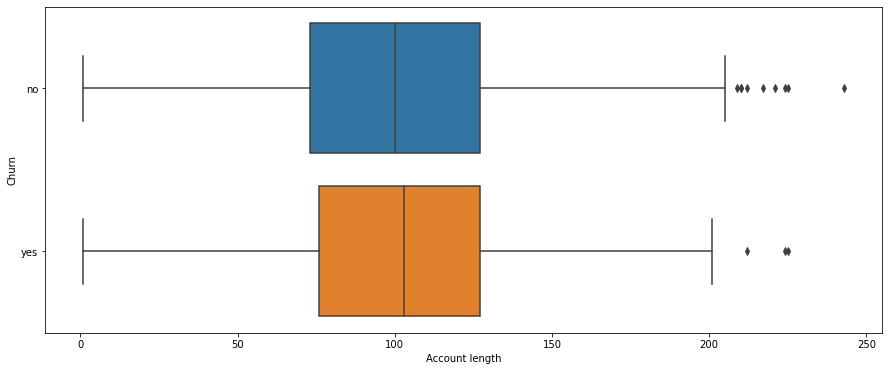

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


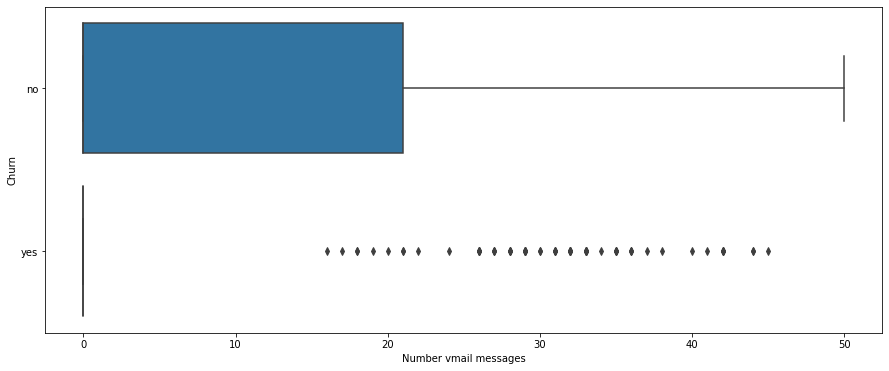

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


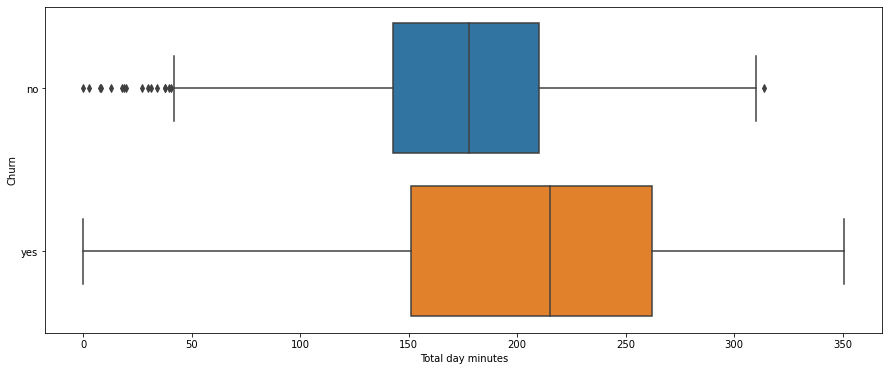

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


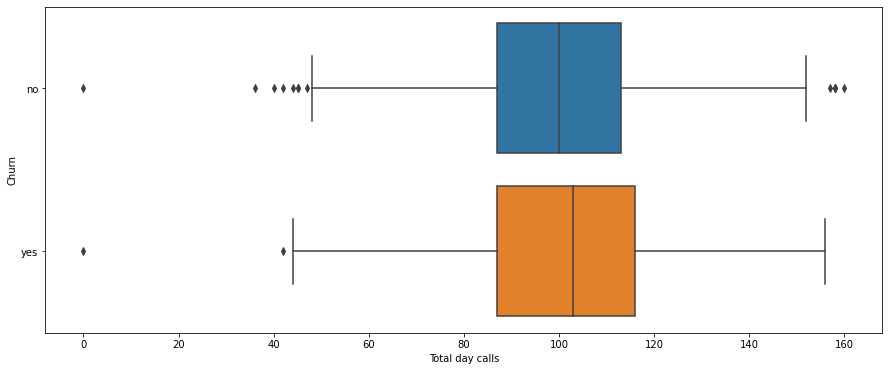

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


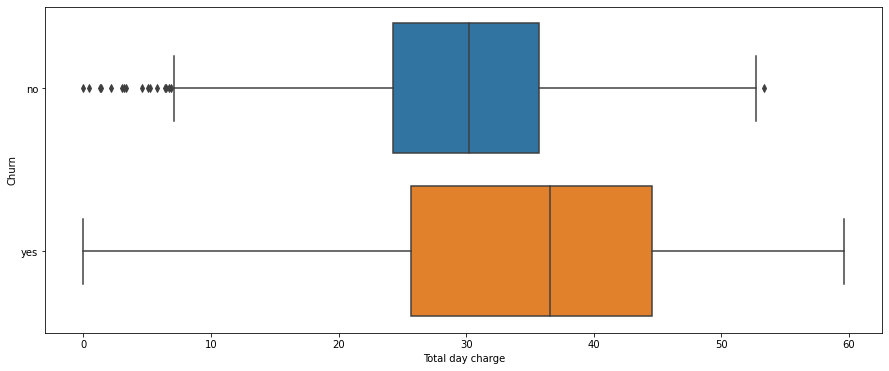

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


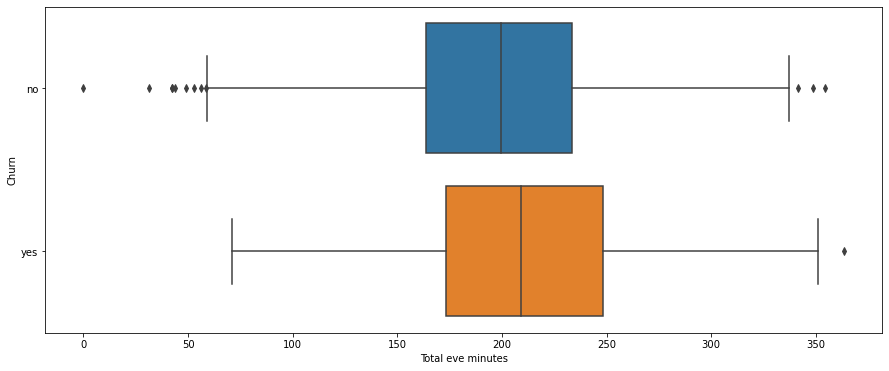

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


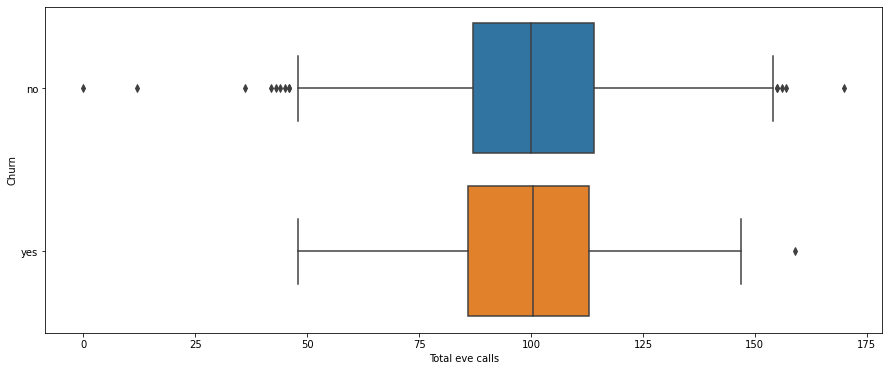

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


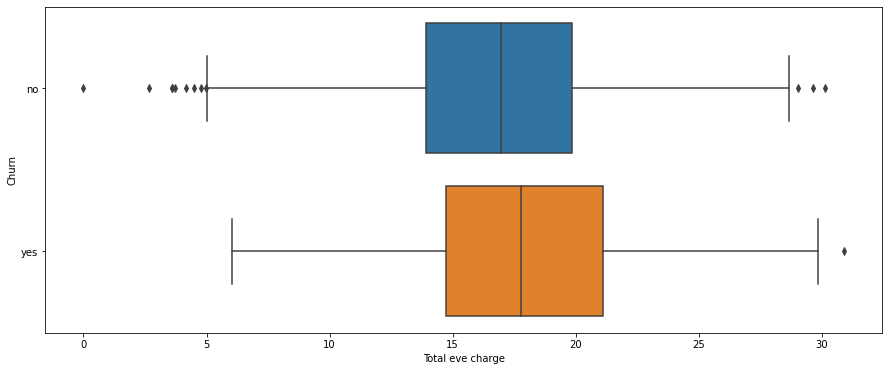

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


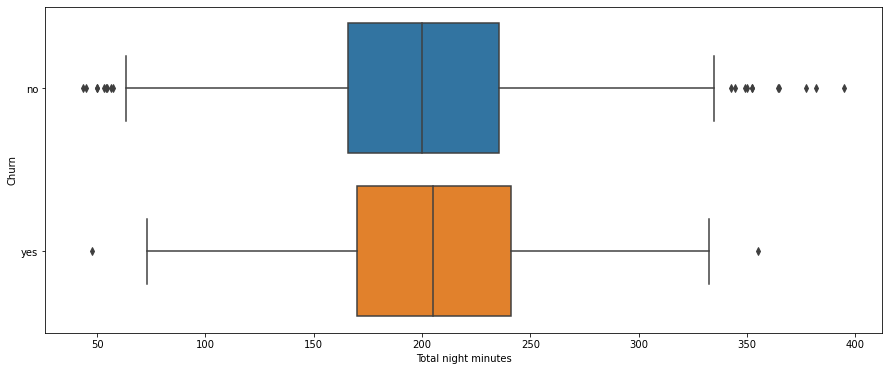

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


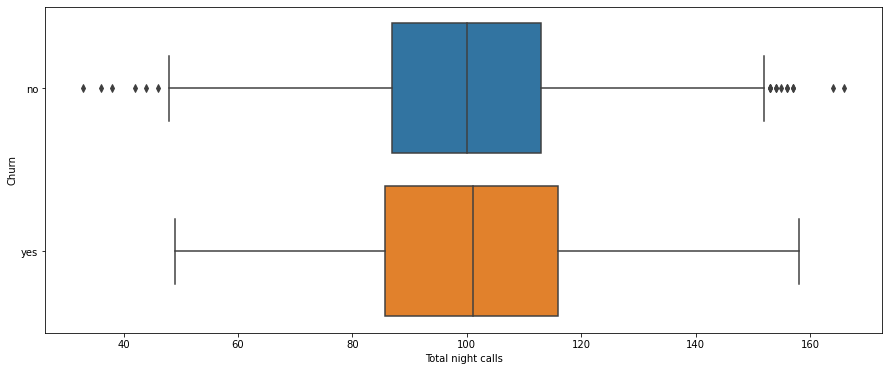

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


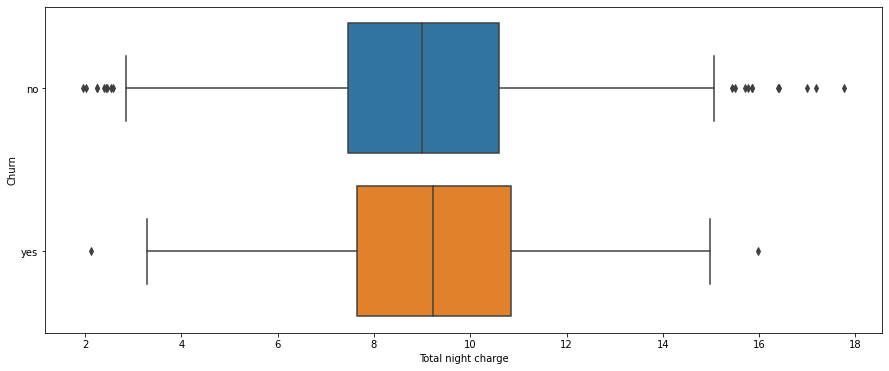

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


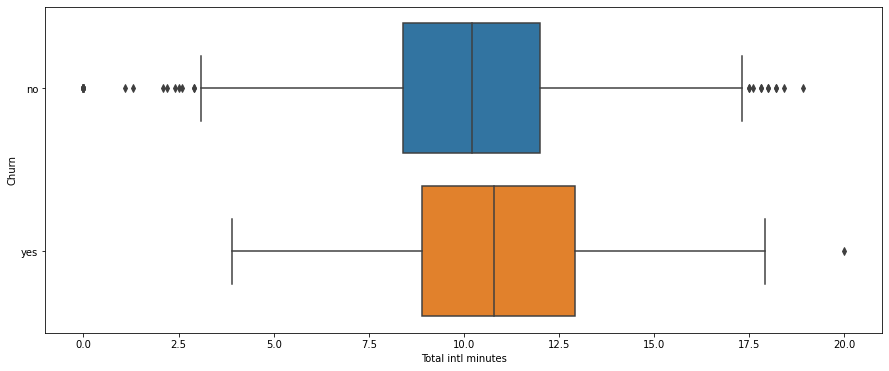

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


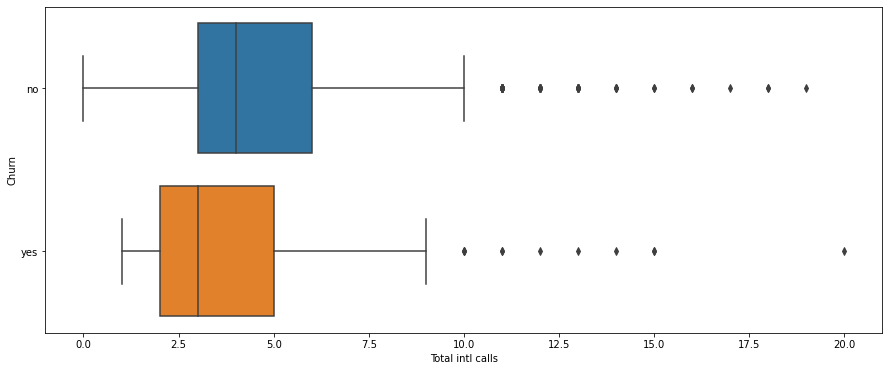

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


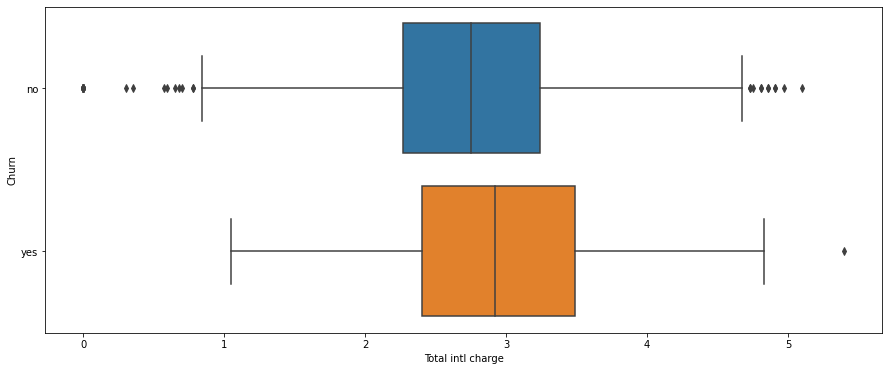

C:\Users\peter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


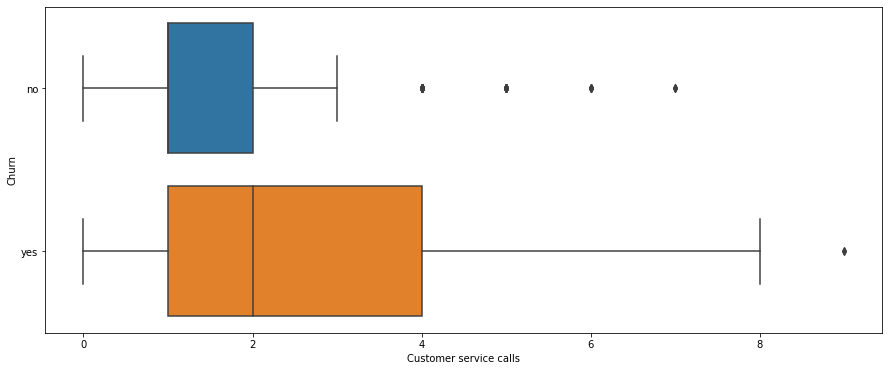

In [46]:
for col in variaveis_numericas:
    plt.figure(figsize=(15,6))
    sns.boxplot(data[col],data['Churn'])
    plt.show()

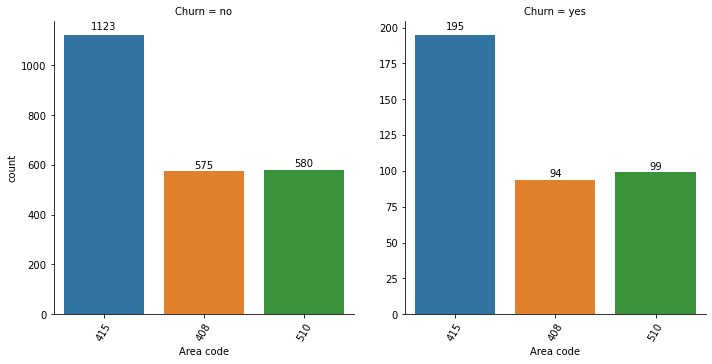

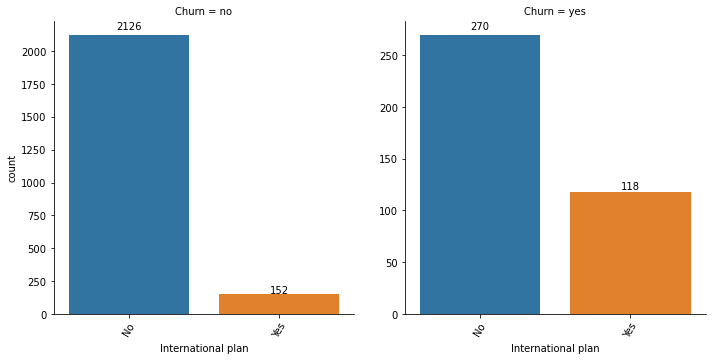

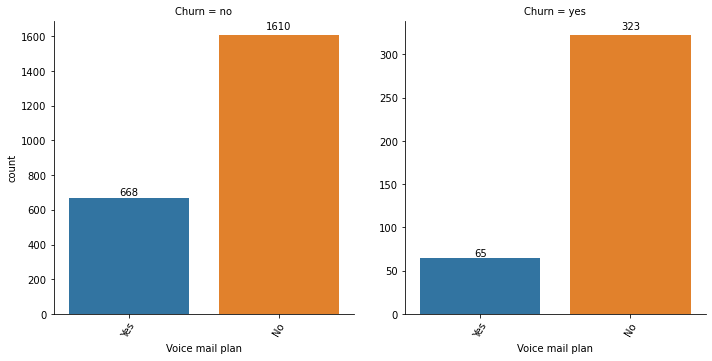

In [50]:
for col in variaveis_categoricas[:-1]:
    if data[col].nunique() <= 15:
        g = sns.catplot(x = col, kind='count', col = 'Churn', data=data, sharey=False)
        g.set_xticklabels(rotation=60)
        for i in range(data['Churn'].nunique()):
            ax = g.facet_axis(0,i)
            for p in ax.patches:
                height = p.get_height()
                ax.text(x = p.get_x()+(p.get_width()/2), y = height * 1.02 , s = '{:.0f}'.format(height), ha = 'center')

## Feature Engineering

In [52]:
l_encoder=LabelEncoder() #atribui valores aos valores da coluna

In [62]:
l_encoder.fit_transform(data['International plan'])

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
l_encoder.classes_


array(['No', 'Yes'], dtype=object)

In [64]:
for col in variaveis_categoricas:
    l_encoder=LabelEncoder()
    data[col]=l_encoder.fit_transform(data[col])
    print(l_encoder.classes_)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
['408' '415' '510']
['No' 'Yes']
['No' 'Yes']
['no' 'yes']


In [65]:
display(data)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,1,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,3,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,49,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,39,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [68]:
y=data['Churn']
x=data.drop('Churn',axis=1)
x_treino,x_teste,y_treino,y_teste=train_test_split(x,y, test_size=0.2 ,random_state=1)

In [69]:
model=RandomForestClassifier()
model.fit(x_treino,y_treino)

RandomForestClassifier()

In [71]:
y_pred=model.predict(x_teste)

In [72]:
accuracy_score(y_teste,y_pred)

0.9475

In [75]:
y_pred_prob=model.predict_proba(x_teste)[:,1]


In [76]:
roc_auc_score(y_teste,y_pred_prob)

0.8993630413835391

In [77]:
model.feature_importances_

array([0.0260255 , 0.02890724, 0.00730269, 0.09214225, 0.01515212,
       0.02103465, 0.12857019, 0.03316214, 0.13722226, 0.06868149,
       0.02766529, 0.06274888, 0.03510041, 0.03219482, 0.036084  ,
       0.04541662, 0.04748078, 0.04210336, 0.11300531])

In [79]:
importance=pd.DataFrame({'variaveisx':x.columns,'importancia':model.feature_importances_})
display(importance)

,variaveisx,importancia
0,State,0.026026
1,Account length,0.028907
2,Area code,0.007303
3,International plan,0.092142
4,Voice mail plan,0.015152
5,Number vmail messages,0.021035
6,Total day minutes,0.128570
7,Total day calls,0.033162
8,Total day charge,0.137222
9,Total eve minutes,0.068681


In [104]:
importance.sort_values('importancia',ascending=False)[:10].sum()


variaveisx     Total day chargeTotal day minutesCustomer serv...
importancia                                             0.773455
dtype: object

In [88]:
importance_ordenada=importance.sort_values('importancia',ascending=False)

Text(0.5, 1.0, 'importancia das variaveis')

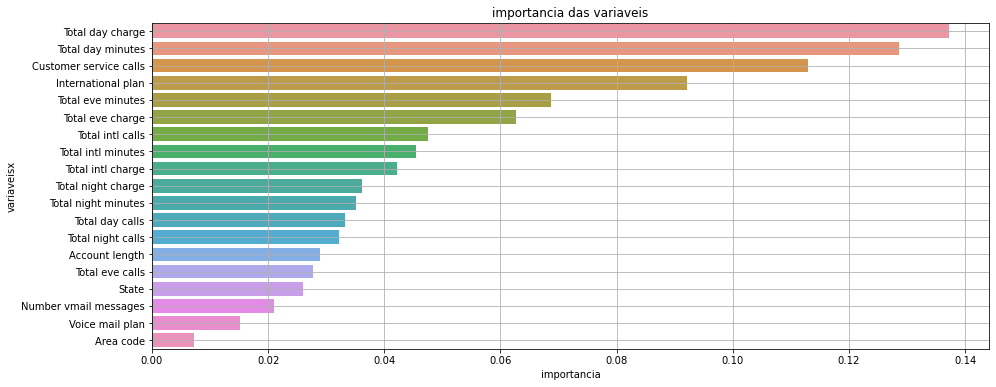

In [91]:
plt.figure(figsize=(15,6))
sns.barplot(x=importance_ordenada['importancia'],y=importance_ordenada['variaveisx'])
plt.grid()
plt.title('importancia das variaveis')


In [99]:
data[data['Total day charge'].between(40,50)]['Churn'].value_counts(normalize=True)

0    0.661064
1    0.338936
Name: Churn, dtype: float64

In [100]:
data[~data['Total day charge'].between(40,50)]['Churn'].value_counts(normalize=True) #nos mostra a taxa de churn fora do valor 45 e 50


0    0.884366
1    0.115634
Name: Churn, dtype: float64

## Considerações
-tendencia de churn no 'Total day charge' entre 45 e 50
-tendencia de churn no 'Total day minutes' entre 250 e 300

